In [14]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# import pydicom as dicom
# import matplotlib.pylab as plt

In [2]:
fix_demo = pd.read_csv('/data2/MIMIC_CXR_JPG/jpg2/EyeTracking/physionet.org/files/reflacx-xray-localization/1.0.0/main_data/P102R108387/fixations.csv')
fix_demo.head()

,timestamp_start_fixation,timestamp_end_fixation,x_position,y_position,pupil_area_normalized,angular_resolution_x_pixels_per_degree,angular_resolution_y_pixels_per_degree,window_width,window_level,xmin_shown_from_image,ymin_shown_from_image,xmax_shown_from_image,ymax_shown_from_image,xmin_in_screen_coordinates,ymin_in_screen_coordinates,xmax_in_screen_coordinates,ymax_in_screen_coordinates
0,0.034,0.771,998,1254,2.132,129,128,1.00020,0.50012,0,0,2544,3056,1021,0,2819,2160
1,0.801,1.007,746,1486,1.747,130,129,0.99969,0.49976,0,0,2544,3056,1021,0,2819,2160
2,1.059,1.336,600,603,1.293,131,129,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
3,1.362,1.603,870,492,1.112,129,129,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160
4,1.633,1.822,398,337,1.101,131,130,0.99829,0.49841,0,0,2544,3056,1021,0,2819,2160


In [74]:
id = 'P102R915878'
path = '/data2/MIMIC_CXR_JPG/jpg2/'

In [65]:
metadt = pd.read_csv('/data2/MIMIC_CXR_JPG/jpg2/EyeTracking/physionet.org/files/reflacx-xray-localization/1.0.0/main_data/metadata_phase_1.csv')
metadt.head()

,id,split,eye_tracking_data_discarded,image,dicom_id,subject_id,image_size_x,image_size_y,Airway wall thickening,Atelectasis,...,Mass,Nodule,Other,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary edema,Quality issue,Support devices,Wide mediastinum
0,P102R108387,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0,0,...,0,0,NaN,0,0,0,0,False,True,0
1,P102R379837,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0,0,...,0,0,NaN,0,0,0,0,False,True,0
2,P102R558314,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,4,0,...,0,0,NaN,0,0,0,0,False,True,0
3,P102R765317,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0,0,...,0,1,NaN,0,0,0,0,False,True,2
4,P102R915878,train,False,physionet.org/files/mimic-cxr/2.0.0/files/p18/...,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,2544,3056,0,0,...,0,0,NaN,0,0,0,0,False,True,0


In [75]:
img_x = metadt[metadt['id']==id]['image_size_x'].tolist()[0]
img_y = metadt[metadt['id']==id]['image_size_y'].tolist()[0]
print(f"image size: {img_x}*{img_y}")

image size: 2544*3056


In [76]:
image_loc = metadt[metadt['id']==id]['image'].tolist()[0]

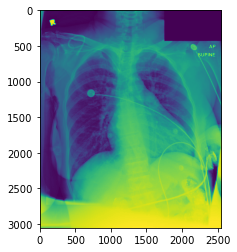

In [77]:
# Read Images
img = mpimg.imread(img_path)
 
# Output Images
plt.imshow(img)

In [78]:
# using region of the image shown on the graph and the region of the image shown on the screen to calculate the location of the fixation point in the whole image
# need to judge whether the fixation in the image or not
# _shown_from_image --> image zoom area
#_in_screen_coordinates --> image area on the screen

fix_processed = fix_demo.copy()
fix_processed['x_position_in_image']=''
fix_processed['y_position_in_image']=''

for index, row in fix_demo.iterrows():
    # coordinates inside the image area
    img_fix_x = row['x_position']-row['xmin_in_screen_coordinates']
    img_fix_y = row['y_position']-row['ymin_in_screen_coordinates']
    
    if img_fix_x>0 and img_fix_y>0:
        img_fix_x_real = img_fix_x / (row['xmax_in_screen_coordinates']-row['xmin_in_screen_coordinates']) * (row['xmax_shown_from_image']-row['xmin_shown_from_image']) + row['xmin_shown_from_image']
        img_fix_y_real = img_fix_y / (row['ymax_in_screen_coordinates']-row['ymin_in_screen_coordinates']) * (row['ymax_shown_from_image']-row['ymin_shown_from_image']) + row['ymin_shown_from_image']
        
        fix_processed.loc[index, 'x_position_in_image'] = img_fix_x_real
        fix_processed.loc[index, 'y_position_in_image'] = img_fix_y_real
        

In [60]:
fix_processed.head(50)

,timestamp_start_fixation,timestamp_end_fixation,x_position,y_position,pupil_area_normalized,angular_resolution_x_pixels_per_degree,angular_resolution_y_pixels_per_degree,window_width,window_level,xmin_shown_from_image,...,xmin_in_screen_coordinates,ymin_in_screen_coordinates,xmax_in_screen_coordinates,ymax_in_screen_coordinates,img_screen_width,img_screen_height,img_shown_width,img_shown_height,x_position_in_image,y_position_in_image
0,0.034,0.771,998,1254,2.132,129,128,1.00020,0.50012,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
1,0.801,1.007,746,1486,1.747,130,129,0.99969,0.49976,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
2,1.059,1.336,600,603,1.293,131,129,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
3,1.362,1.603,870,492,1.112,129,129,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
4,1.633,1.822,398,337,1.101,131,130,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
5,1.933,2.221,413,317,1.199,132,131,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
6,2.270,2.683,928,661,1.332,129,129,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
7,2.707,2.865,935,675,1.389,129,129,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,,
8,2.892,3.120,1095,794,1.321,128,128,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,104.703003,1123.362963
9,3.138,3.642,1138,659,1.201,127,127,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,165.543938,932.362963


In [79]:
valid_fix = fix_processed[(fix_processed['x_position_in_image']!='') & (fix_processed['y_position_in_image']!='')]
valid_fix.head()

,timestamp_start_fixation,timestamp_end_fixation,x_position,y_position,pupil_area_normalized,angular_resolution_x_pixels_per_degree,angular_resolution_y_pixels_per_degree,window_width,window_level,xmin_shown_from_image,...,xmin_in_screen_coordinates,ymin_in_screen_coordinates,xmax_in_screen_coordinates,ymax_in_screen_coordinates,img_screen_width,img_screen_height,img_shown_width,img_shown_height,x_position_in_image,y_position_in_image
8,2.892,3.120,1095,794,1.321,128,128,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,104.703003,1123.362963
9,3.138,3.642,1138,659,1.201,127,127,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,165.543938,932.362963
11,4.610,4.991,1283,1269,1.134,127,126,0.99829,0.49841,0,...,1021,0,2819,2160,1798,2160,2544,3056,370.705228,1795.4
12,5.030,5.405,1067,746,1.038,90,90,0.99829,0.49841,0,...,661,0,3180,2160,2519,2160,2521,2160,406.32235,1049.0
13,5.433,5.601,1234,892,0.941,90,90,0.99829,0.49841,0,...,661,0,3180,2160,2519,2160,2521,2160,573.454942,1195.0


In [80]:
valid_fix = valid_fix.sort_values(by=['timestamp_start_fixation'])

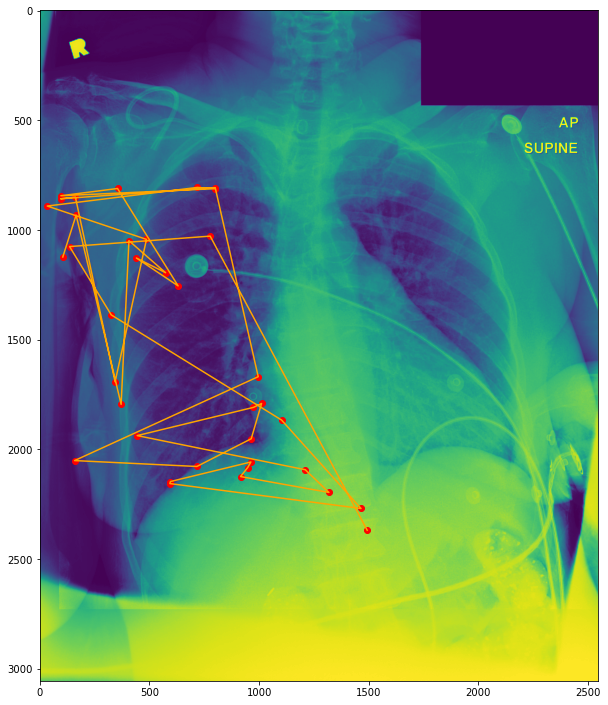

In [81]:
plt.figure(figsize=(10,14))
plt.plot(valid_fix['x_position_in_image'], valid_fix['y_position_in_image'], c ="orange")
plt.scatter(valid_fix['x_position_in_image'], valid_fix['y_position_in_image'], c ="red")
plt.imshow(img)

In [82]:
fix_demo['img_screen_width'] = fix_demo['xmax_in_screen_coordinates'] - fix_demo['xmin_in_screen_coordinates']
fix_demo['img_screen_height'] = fix_demo['ymax_in_screen_coordinates'] - fix_demo['ymin_in_screen_coordinates']
fix_demo['img_shown_width'] = fix_demo['xmax_shown_from_image'] - fix_demo['xmin_shown_from_image']
fix_demo['img_shown_height'] = fix_demo['ymax_shown_from_image'] - fix_demo['ymin_shown_from_image']

fix_demo.head()

,timestamp_start_fixation,timestamp_end_fixation,x_position,y_position,pupil_area_normalized,angular_resolution_x_pixels_per_degree,angular_resolution_y_pixels_per_degree,window_width,window_level,xmin_shown_from_image,...,xmax_shown_from_image,ymax_shown_from_image,xmin_in_screen_coordinates,ymin_in_screen_coordinates,xmax_in_screen_coordinates,ymax_in_screen_coordinates,img_screen_width,img_screen_height,img_shown_width,img_shown_height
0,0.034,0.771,998,1254,2.132,129,128,1.00020,0.50012,0,...,2544,3056,1021,0,2819,2160,1798,2160,2544,3056
1,0.801,1.007,746,1486,1.747,130,129,0.99969,0.49976,0,...,2544,3056,1021,0,2819,2160,1798,2160,2544,3056
2,1.059,1.336,600,603,1.293,131,129,0.99829,0.49841,0,...,2544,3056,1021,0,2819,2160,1798,2160,2544,3056
3,1.362,1.603,870,492,1.112,129,129,0.99829,0.49841,0,...,2544,3056,1021,0,2819,2160,1798,2160,2544,3056
4,1.633,1.822,398,337,1.101,131,130,0.99829,0.49841,0,...,2544,3056,1021,0,2819,2160,1798,2160,2544,3056
